[Dataset](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification)

In [1]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
audio_dataset_path='Data/genres_original'
metadata=pd.read_csv('Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**Feature Extractor Function**

Mel Frequency Cepstral Coefficients:

These are state-of-the-art features used in automatic speech and speech recognition studies. There are a set of steps for generation of these features:

Since the audio signals are constantly changing, first we divide these signals into smaller frames. Each frame is around 20-40 ms long
Then we try to identify different frequencies present in each frame
Now, separate linguistic frequencies from the noise
To discard the noise, it then takes discrete cosine transform (DCT) of these frequencies. Using DCT we keep only a specific sequence of frequencies that have a high probability of information.

In [3]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [4]:
 metadata.drop(labels=552, axis=0, inplace=True)

In [5]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))    
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

553it [00:31, 17.56it/s]c:\users\tguru\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
557it [00:31, 17.43it/s]

Error: 


999it [00:57, 17.30it/s]


In [6]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [7]:
extracted_features_df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: class, dtype: int64

**Split the dataset into independent and dependent dataset**

In [8]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [9]:
X.shape

(998, 40)

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [11]:
y.shape

(998, 10)

**Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train

array([[-1.04723763e+02,  8.77537155e+01, -3.32488594e+01, ...,
        -2.38248777e+00, -1.36347127e+00, -7.22123563e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697758e+00, -3.90829563e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346803e+00, ...,
        -3.43661404e+00, -1.73870683e+00, -4.68738899e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763937e+00, -1.77685583e+00, -1.75431299e+00],
       [-2.37930965e+01,  8.29835587e+01,  2.32049251e+00, ...,
         1.40550280e+00,  4.16220367e-01, -3.45980115e-02],
       [-9.63197021e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698343e-01, -1.84749973e+00]], dtype=float32)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [15]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [17]:
### No of classes
num_labels=y.shape[1]

In [18]:
y.shape[1]

10

In [19]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              41984     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [21]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [22]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
25/25 [==============================] - 1s 19ms/step - loss: 4.7459 - accuracy: 0.1040 - val_loss: 2.3372 - val_accuracy: 0.0600

Epoch 00001: val_loss improved from inf to 2.33722, saving model to saved_models\audio_classification_.hdf5
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 2.7134 - accuracy: 0.1015 - val_loss: 2.2738 - val_accuracy: 0.1200

Epoch 00002: val_loss improved from 2.33722 to 2.27376, saving model to saved_models\audio_classification_.hdf5
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 2.3723 - accuracy: 0.1341 - val_loss: 2.2479 - val_accuracy: 0.1100

Epoch 00003: val_loss improved from 2.27376 to 2.24786, saving model to saved_models\audio_classification_.hdf5
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 2.3108 - accuracy: 0.1491 - val_loss: 2.2099 - val_accuracy: 0.1350

Epoch 00004: val_loss improved from 2.24786 to 2.20986, saving model to saved_models\audio_class

Epoch 37/100
25/25 [==============================] - 0s 10ms/step - loss: 1.5416 - accuracy: 0.4211 - val_loss: 1.6598 - val_accuracy: 0.4250

Epoch 00037: val_loss did not improve from 1.58119
Epoch 38/100
25/25 [==============================] - 0s 10ms/step - loss: 1.5326 - accuracy: 0.4123 - val_loss: 1.6026 - val_accuracy: 0.4700

Epoch 00038: val_loss did not improve from 1.58119
Epoch 39/100
25/25 [==============================] - 0s 10ms/step - loss: 1.5049 - accuracy: 0.4223 - val_loss: 1.5259 - val_accuracy: 0.4500

Epoch 00039: val_loss improved from 1.58119 to 1.52589, saving model to saved_models\audio_classification_.hdf5
Epoch 40/100
25/25 [==============================] - 0s 10ms/step - loss: 1.5310 - accuracy: 0.4298 - val_loss: 1.5867 - val_accuracy: 0.5050

Epoch 00040: val_loss did not improve from 1.52589
Epoch 41/100
25/25 [==============================] - 0s 10ms/step - loss: 1.4667 - accuracy: 0.4474 - val_loss: 1.5991 - val_accuracy: 0.4850

Epoch 00041: va

25/25 [==============================] - 0s 10ms/step - loss: 0.9941 - accuracy: 0.6504 - val_loss: 1.6141 - val_accuracy: 0.5600

Epoch 00078: val_loss did not improve from 1.46029
Epoch 79/100
25/25 [==============================] - 0s 10ms/step - loss: 0.9725 - accuracy: 0.6591 - val_loss: 1.6469 - val_accuracy: 0.5550

Epoch 00079: val_loss did not improve from 1.46029
Epoch 80/100
25/25 [==============================] - 0s 10ms/step - loss: 0.8883 - accuracy: 0.6742 - val_loss: 1.7951 - val_accuracy: 0.5850

Epoch 00080: val_loss did not improve from 1.46029
Epoch 81/100
25/25 [==============================] - 0s 10ms/step - loss: 0.9490 - accuracy: 0.6742 - val_loss: 1.6494 - val_accuracy: 0.5950

Epoch 00081: val_loss did not improve from 1.46029
Epoch 82/100
25/25 [==============================] - 0s 10ms/step - loss: 0.9442 - accuracy: 0.6754 - val_loss: 1.7575 - val_accuracy: 0.5650

Epoch 00082: val_loss did not improve from 1.46029
Epoch 83/100
25/25 [==================

In [23]:
model.evaluate(X_test,y_test,verbose=0)

[1.7638777494430542, 0.5849999785423279]

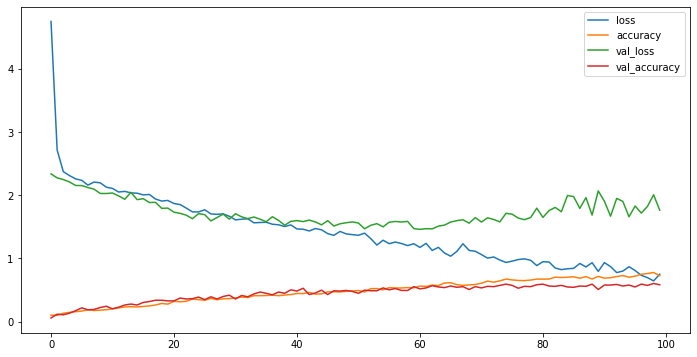

In [24]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [25]:
model.predict_classes(X_test)

c:\users\tguru\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 7, 0, 7, 6, 7, 5, 2, 8, 2, 6, 4, 1, 1, 5, 7, 6, 5, 9, 0, 4, 2,
       8, 0, 1, 7, 5, 2, 8, 6, 7, 4, 9, 9, 6, 6, 3, 5, 9, 7, 6, 3, 3, 3,
       9, 8, 4, 3, 5, 6, 5, 8, 6, 2, 9, 2, 9, 2, 3, 6, 6, 8, 3, 3, 4, 9,
       1, 4, 3, 1, 6, 3, 9, 9, 4, 9, 2, 4, 6, 9, 8, 6, 8, 3, 2, 5, 8, 8,
       4, 2, 4, 0, 9, 3, 6, 7, 7, 5, 2, 0, 5, 5, 4, 2, 1, 4, 7, 8, 1, 6,
       9, 4, 9, 3, 6, 3, 4, 6, 3, 2, 4, 8, 2, 9, 9, 7, 1, 2, 3, 3, 3, 9,
       5, 4, 1, 3, 3, 4, 9, 5, 9, 3, 9, 0, 2, 0, 4, 3, 4, 3, 6, 8, 7, 2,
       8, 6, 4, 3, 4, 2, 6, 5, 6, 4, 7, 1, 7, 0, 7, 2, 3, 6, 1, 7, 7, 1,
       9, 7, 2, 3, 9, 3, 6, 8, 7, 2, 2, 6, 3, 7, 9, 6, 1, 2, 2, 9, 6, 3,
       2, 1], dtype=int64)

In [28]:
filename="Data\genres_original\metal\metal.00002.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class[0]

[-62.234993   115.17359    -42.7843      54.301395   -24.871058
  20.127165   -21.63533     20.841627    -8.395902    20.32247
 -10.730717     9.666507   -14.542503     6.930495    -7.477543
   5.972606    -3.473475     6.566592    -6.5757904    2.9632413
  -0.57955104  -0.50075704  -4.443025     2.410923    -1.5684437
  -1.1950624   -1.6032081   -2.9379685   -0.61058384  -2.043401
   0.8284437    0.51315373  -0.13800889  -3.1573064    1.8865256
  -0.27951345   1.4392793    0.8349834    1.1822544   -1.532092  ]
[[-62.234993   115.17359    -42.7843      54.301395   -24.871058
   20.127165   -21.63533     20.841627    -8.395902    20.32247
  -10.730717     9.666507   -14.542503     6.930495    -7.477543
    5.972606    -3.473475     6.566592    -6.5757904    2.9632413
   -0.57955104  -0.50075704  -4.443025     2.410923    -1.5684437
   -1.1950624   -1.6032081   -2.9379685   -0.61058384  -2.043401
    0.8284437    0.51315373  -0.13800889  -3.1573064    1.8865256
   -0.27951345   1.4392793

'metal'